# Deeplab

In [2]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [3]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 0
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [0,1,4,5]
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[0]

In [4]:
data = None
is_eval, is_pred = False, False

In [5]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-vegas')


Data finished loading: data/train/AOI_2_Vegas_Train


epoch      trn_loss   val_loss   mask_acc                    
    0      0.139788   0.127356   0.188795  
    1      0.141293   0.136489   0.188795                    
 90%|████████▉ | 467/521 [11:48<01:21,  1.52s/it, loss=0.14]     2      0.140188   0.12732    0.188795  
    12     0.141961   0.129123   0.188795                    
    13     0.136761   0.128947   0.188795                    

CPU times: user 1d 3h 2min 5s, sys: 14h 6min 57s, total: 1d 17h 9min 2s
Wall time: 3h 59min 25s


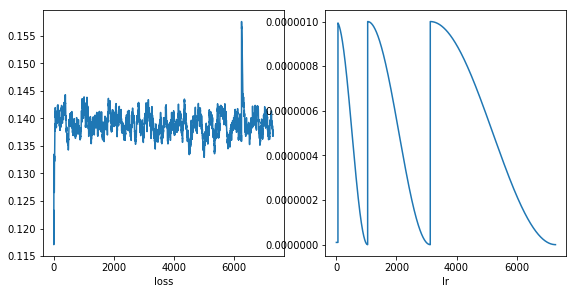

In [6]:
%%time
lr = 1e-5 / 10
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 1, 'deeplab-vegas', lrs=lrs, n_cycles=3, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-vegas')

In [13]:
learn.lr_find()
learn.sched.plot()

  0%|          | 0/362 [00:00<?, ?it/s]                      

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58